# PROJECT- Predicting The Mushrooms Edibility Using Logistic Regression

# #Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

# Target:
Our Target variable is 'class' which contains 2 classes as given below:
  1. Edibility
  2. Poisonous
      
# Important Observations on data description:

  1) Binary Classification models are used to predict,because the targe as only 2 variables.
  
  2)There are 23 no.of columns.


# # Importing required libraries and loading the data set:

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# #Graphical Data Analysis of all the features in the data withrespect to class label:

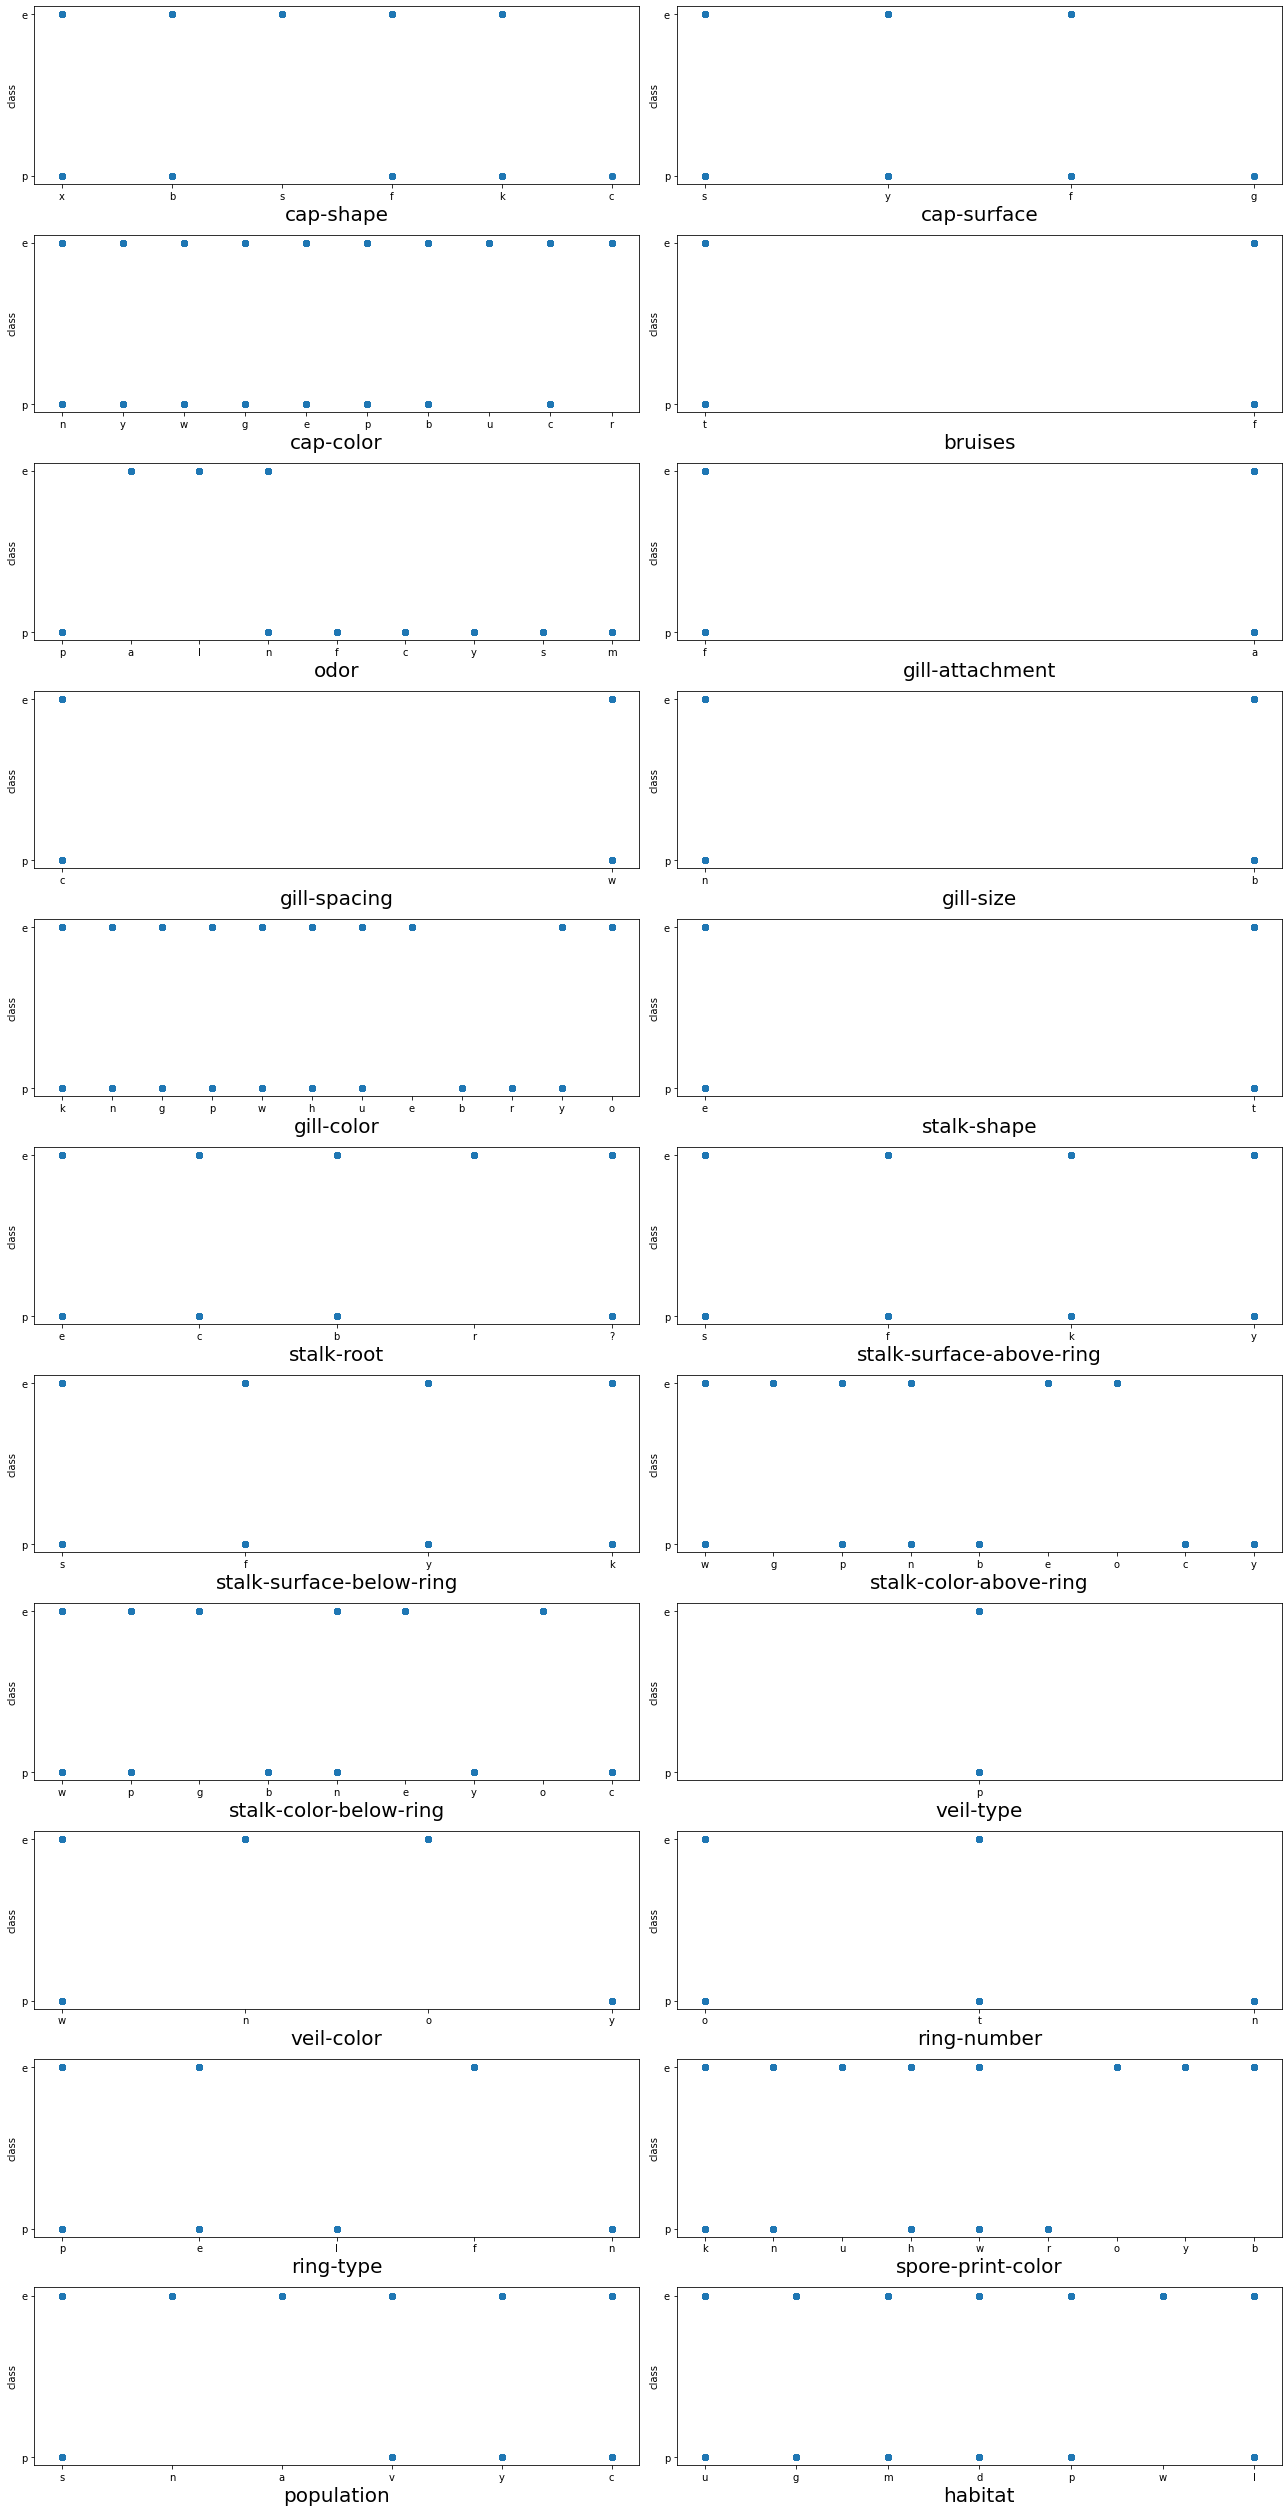

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

y=df['class']
x=df.drop(columns=['class'])
plt.figure(figsize=(18,35),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=22:
        ax=plt.subplot(11,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=10)
    plotnumber+=1 
plt.tight_layout()

#The features like 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat' are almost Equally Distributed with repect to Class Label

In [5]:
#Checking the 2 different classes in the target variable 'class':
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
#Replacing the class column values:
df['class']=df['class'].replace({'p':1,'e':0})

In [7]:
#splitting the data set into features(x) and label(y):
x=df.drop(columns=['class'])
y=df['class']

# #Label Encoder :
label Encoder is needeed to convert all the feautes(except 'class') in to numeric values so that it is used to check correlaion of feautures and label

In [8]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in x:
    df2=lab_enc.fit_transform(df[i])
    df[i]=df2
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
df.shape #To get the data dimension 

(8124, 23)

In [10]:
df['veil-type'].value_counts() #To find the count of 'veil-type' feature

0    8124
Name: veil-type, dtype: int64

In [11]:
#Dropping the null value column 'veil-type':
df=df.drop(columns=['veil-type'])

# #Correlation:

In [12]:
corr=df.corr()
corr['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

# #Correlation Using Heatmap:

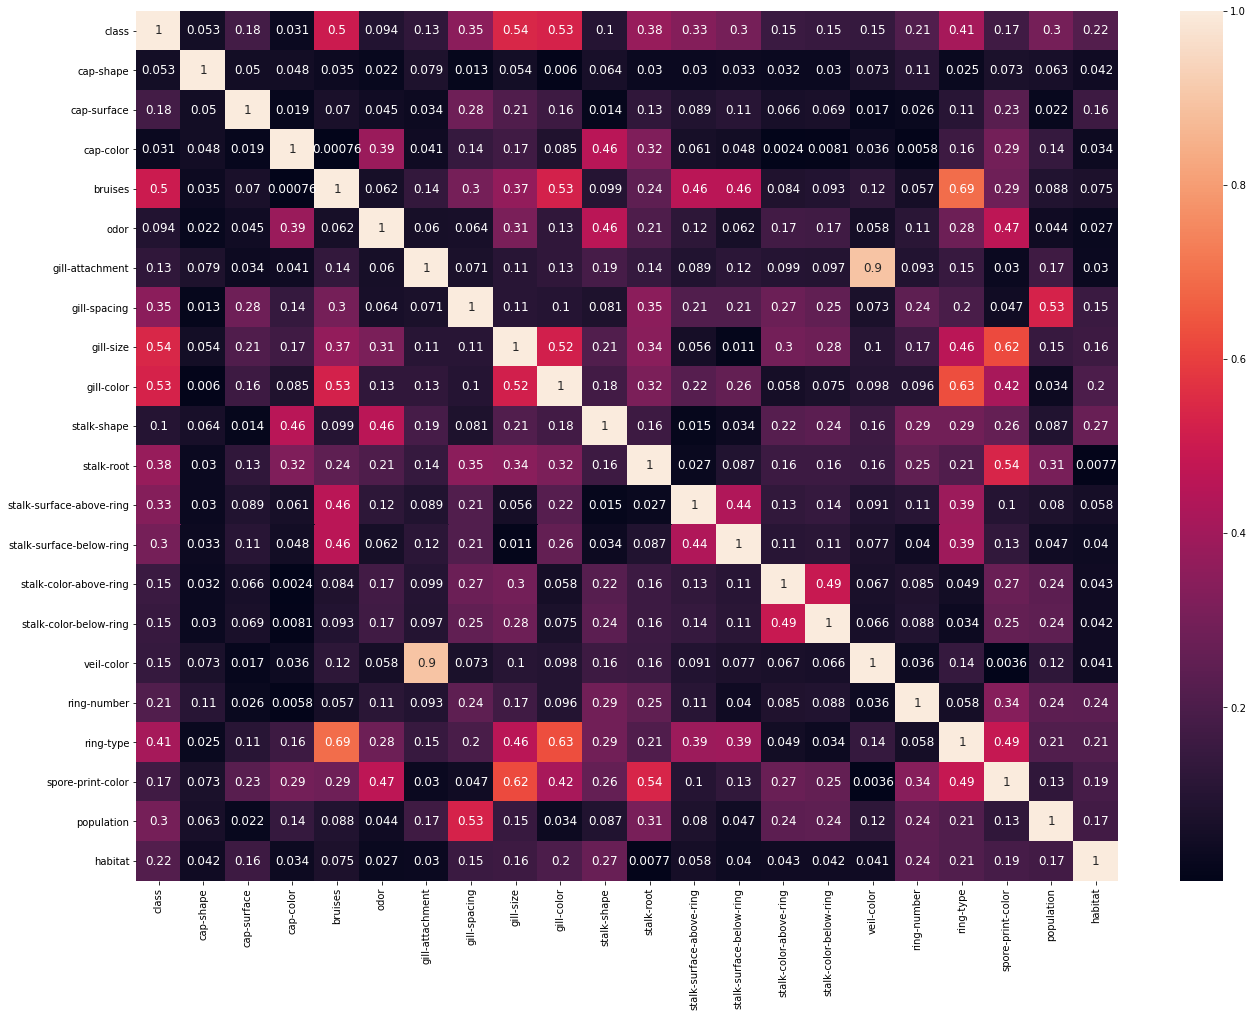

In [13]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()    

# Outcome of Correlation:
All the columns of the dataset is positively correlated with the target column.

Maximun correlated feature:gill-size

minimun correlated feature:cap-shape

# #Describing Data Sets:

In [14]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


There are 22 columns.So, all are not getting displayed here.we will check for outliers and skewness seperately in further steps

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

From the above Code we have the Columns Data types and Memory used by the Data frame.

# #Checking Outliers:

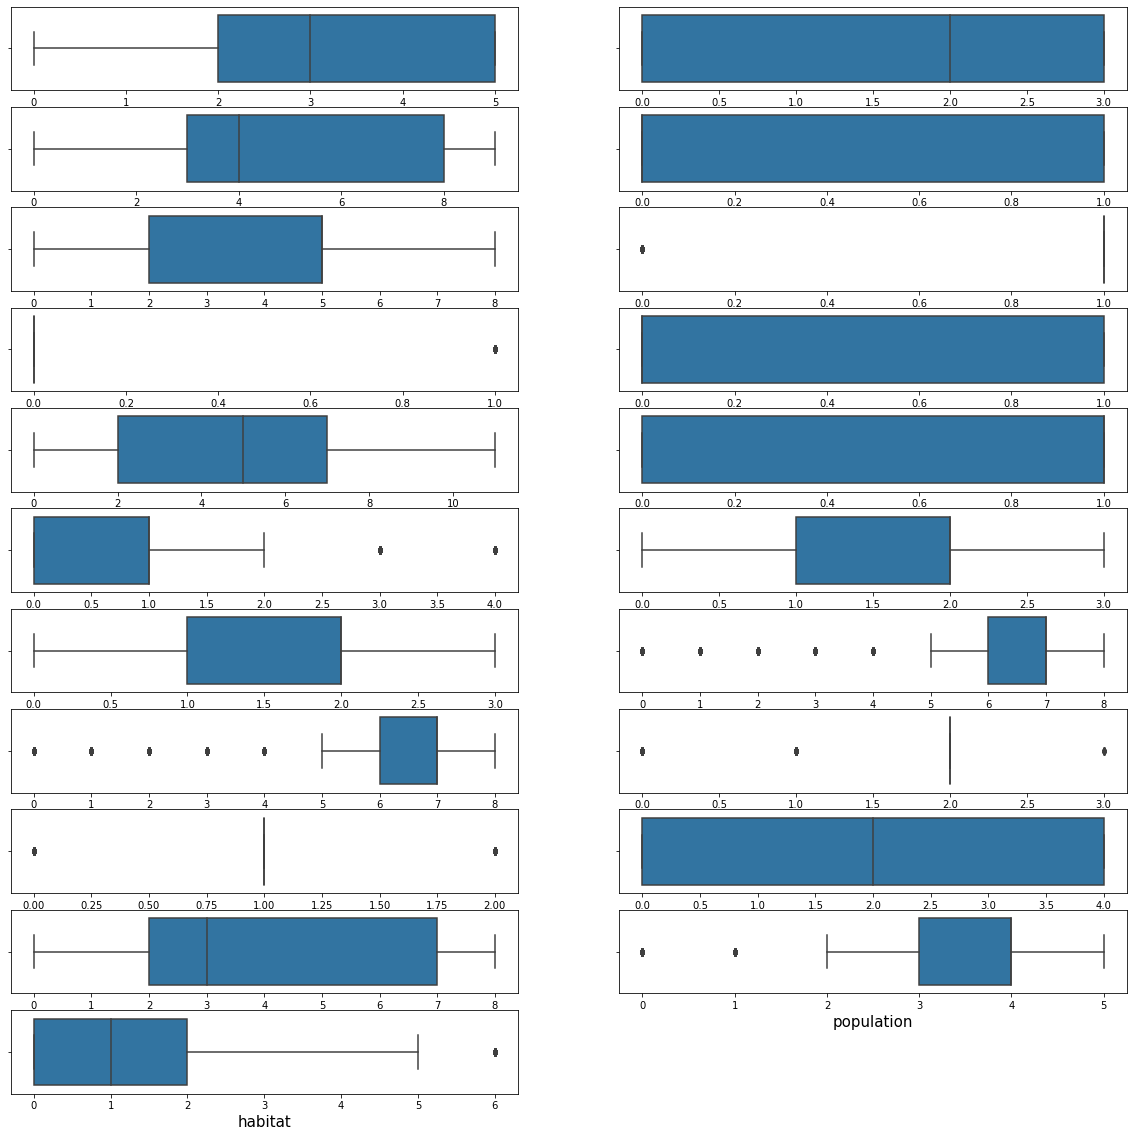

In [19]:
import warnings
warnings.filterwarnings('ignore')

x=df.drop(columns=['class'])
plt.figure(figsize=(20,20))
graph=1
for column in x:
    if graph<=30:
        ax=plt.subplot(11,2,graph)
        sns.boxplot(x[column],orient='h')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

From the above outcome we can see that columns['gill-attachment','gill-spacing',
'stalk-root','stalk-color-above-ring','stalk-color-below-ring','veil-color', 'ring-number',
'population', 'habitat']has outliers where as other columns has no outliers. 

# #Skewness:

In [22]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Skewness threshold is taken as +/-0.5.Columns which are having skewness are:
    

'habitat','population','ring-number','veil-color','stalk-color-below-ring',

'stalk-surface-above-ring','stalk-surface-above-ring',

'stalk-root','gill-color','gill-spacing','gill-attachment','odor','class'

# #Data Cleaning and Normal distributin Curve :

In [23]:
df3=df[['habitat','population','ring-number','veil-color','stalk-color-below-ring','stalk-surface-above-ring','stalk-surface-above-ring','stalk-root','gill-color','gill-spacing','gill-attachment','odor','class']]

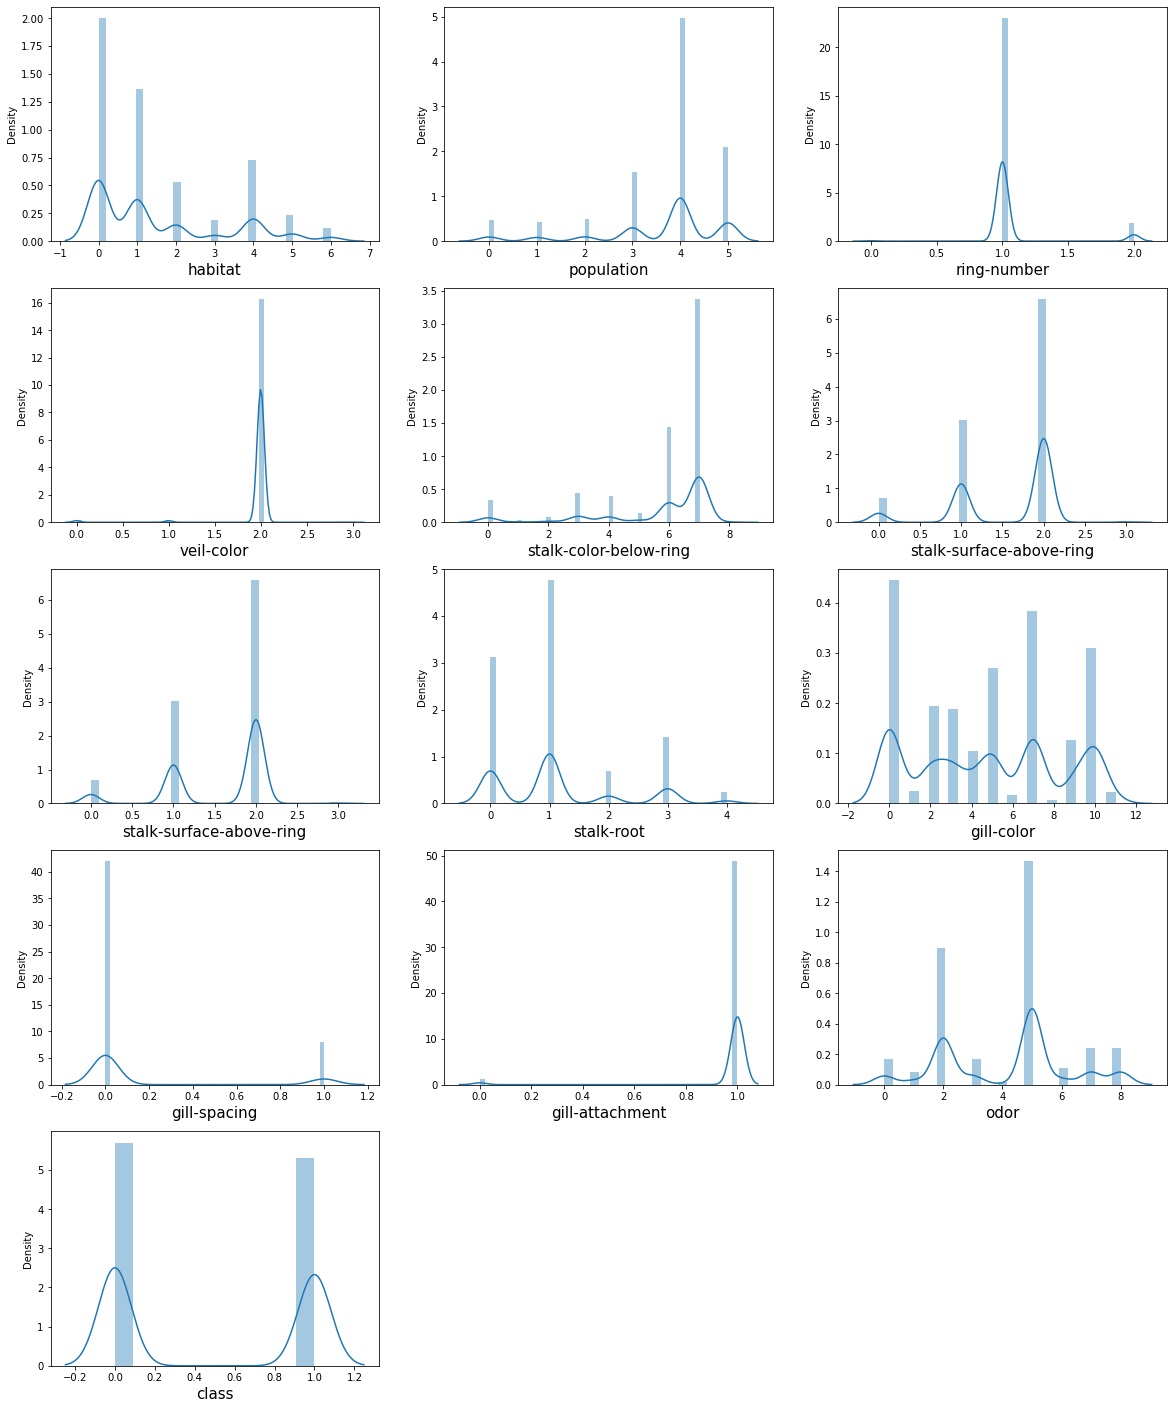

In [24]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df3:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()    

The data in the columns are not normalised.The building blocks of all the graphs is out of normalised curve.

In [25]:
df=df.drop(['odor','gill-attachment', 'gill-spacing', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-color-below-ring','veil-color', 'ring-number','population', 'habitat'],axis=1)

Dropping all the columns which are out of threshold value for Skewness:

# #Removing Outliers:

Z-Score Technique:

In [26]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]


In [27]:
df

,class,cap-shape,cap-surface,cap-color,bruises,gill-size,stalk-shape,stalk-surface-below-ring,stalk-color-above-ring,ring-type,spore-print-color
0,1,5,2,4,1,1,0,2,7,4,2
1,0,5,2,9,1,0,0,2,7,4,3
2,0,0,2,8,1,0,0,2,7,4,3
3,1,5,3,8,1,1,0,2,7,4,2
4,0,5,2,3,0,0,1,2,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,0,0,2,5,4,0
8120,0,5,2,4,0,0,0,2,5,4,0
8121,0,2,2,4,0,0,0,2,5,4,0
8122,1,3,3,4,0,1,1,1,7,0,7


# Percentage Data Loss:

In [28]:
loss_percent=(8123-7692)/8123*100
loss_percent

5.305921457589561

checking how many outliers are present and how much loss of data that is acceptable for further testing the data

# Model with desired outliers:

In [29]:
y=df['class']
x=df.drop(columns=['class'])


# #Transforming Data to remove skwness:

In [30]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [31]:
x

array([[ 1.03869748e+00,  2.30660262e-02,  5.96952268e-04, ...,
         7.78626788e-01,  9.03211003e-01, -6.42775839e-01],
       [ 1.03869748e+00,  2.30660262e-02,  1.61422664e+00, ...,
         7.78626788e-01,  9.03211003e-01, -8.03726878e-02],
       [-2.01066853e+00,  2.30660262e-02,  1.35222562e+00, ...,
         7.78626788e-01,  9.03211003e-01, -8.03726878e-02],
       ...,
       [-8.44925711e-01,  2.30660262e-02,  5.96952268e-04, ...,
        -1.35391978e+00,  9.03211003e-01, -2.80152211e+00],
       [-2.30174050e-01,  1.00936119e+00,  5.96952268e-04, ...,
         7.78626788e-01, -1.26247778e+00,  1.26980005e+00],
       [ 1.03869748e+00,  2.30660262e-02,  5.96952268e-04, ...,
        -1.35391978e+00,  9.03211003e-01,  3.55039739e-01]])

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [33]:
x=sc.fit_transform(x)
x

array([[ 1.03869748e+00,  2.30660262e-02,  5.96952268e-04, ...,
         7.78626788e-01,  9.03211003e-01, -6.42775839e-01],
       [ 1.03869748e+00,  2.30660262e-02,  1.61422664e+00, ...,
         7.78626788e-01,  9.03211003e-01, -8.03726878e-02],
       [-2.01066853e+00,  2.30660262e-02,  1.35222562e+00, ...,
         7.78626788e-01,  9.03211003e-01, -8.03726878e-02],
       ...,
       [-8.44925711e-01,  2.30660262e-02,  5.96952268e-04, ...,
        -1.35391978e+00,  9.03211003e-01, -2.80152211e+00],
       [-2.30174050e-01,  1.00936119e+00,  5.96952268e-04, ...,
         7.78626788e-01, -1.26247778e+00,  1.26980005e+00],
       [ 1.03869748e+00,  2.30660262e-02,  5.96952268e-04, ...,
        -1.35391978e+00,  9.03211003e-01,  3.55039739e-01]])

# #Binary Classification Model is Used:

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [35]:
lr=LogisticRegression()


# Splitting the DataFrame:

In [36]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('random_state:-',i)
        print('training accuracy is:',accuracy_score(y_train,pred_train)*100)
        print('testing accuracy is:',accuracy_score(y_test,pred_test)*100)

random_state:- 12
training accuracy is: 90.32992036405005
testing accuracy is: 90.31838856400259
random_state:- 27
training accuracy is: 91.17503656752804
testing accuracy is: 91.22807017543859
random_state:- 48
training accuracy is: 91.07752315943442
testing accuracy is: 91.09811565951917
random_state:- 60
training accuracy is: 90.931253047294
testing accuracy is: 90.90318388564003
random_state:- 64
training accuracy is: 91.1425320981635
testing accuracy is: 91.09811565951917
random_state:- 86
training accuracy is: 91.2400455062571
testing accuracy is: 91.22807017543859
random_state:- 134
training accuracy is: 91.11002762879896
testing accuracy is: 91.09811565951917
random_state:- 154
training accuracy is: 90.39492930277913
testing accuracy is: 90.44834307992203
random_state:- 156
training accuracy is: 90.44368600682594
testing accuracy is: 90.44834307992203
random_state:- 204
training accuracy is: 91.15878433284577
testing accuracy is: 91.22807017543859
random_state:- 208
training ac

In [37]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=953)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('training accuracy is:',accuracy_score(y_train,pred_train)*100)
print('testing accuracy is:',accuracy_score(y_test,pred_test)*100)

training accuracy is: 90.57370388428409
testing accuracy is: 92.07277452891488


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       856
           1       0.91      0.91      0.91       683

    accuracy                           0.92      1539
   macro avg       0.92      0.92      0.92      1539
weighted avg       0.92      0.92      0.92      1539



# #CrossValidation Score for Logistic Regression:

In [39]:
predict_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,predict_lr)
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 59.71138845553822
acc_score- 92.07277452891488
at cv:- 3
cv score- 83.16432657306292
acc_score- 92.07277452891488
at cv:- 4
cv score- 86.23244929797191
acc_score- 92.07277452891488
at cv:- 5
cv score- 83.78900219773534
acc_score- 92.07277452891488
at cv:- 6
cv score- 88.40353614144566
acc_score- 92.07277452891488
at cv:- 7
cv score- 86.71395257486935
acc_score- 92.07277452891488
at cv:- 8
cv score- 85.2062966071811
acc_score- 92.07277452891488
at cv:- 9
cv score- 85.97169913246991
acc_score- 92.07277452891488


Since,cross validation score is almost same.We are heading with the good approach.

In [35]:
lsscore_selected=cross_val_score(lr,x,y,cv=6).mean()

In [36]:
print('cv score is-',lsscore_selected,'\n accuracy score is-',lss)

cv score is- 0.8840353614144566 
 accuracy score is- 0.9005847953216374


# #AUC ROC Curve:

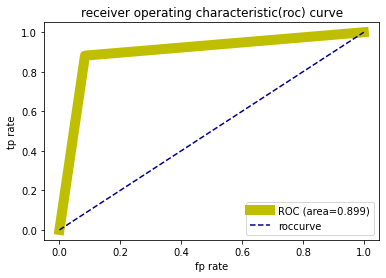

In [39]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='y',lw=10,label='ROC (area=%0.3f)' %roc_auc)
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='roccurve')
plt.xlabel('fp rate')
plt.ylabel('tp rate')
plt.title('receiver operating characteristic(roc) curve')
plt.legend()
plt.show()

# Since the model without outliers performing well !We will select tha data frame

#  #Saving the model:

In [40]:
import pickle
filename='mushrooms.pkl'
pickle.dump(lr,open(filename,'wb'))


# #Conclusion:

In [41]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_com

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1534,0,0
1535,0,0
1536,0,0
1537,0,0
